# http://karpov.courses

In [1]:
# imports for the whole notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

### –û–ø–∏—Å–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
* date ‚Äì –¥–∞—Ç–∞ (2020-03-02 00:00:00 ‚Äì 2020-03-02 01:29:05)
* name ‚Äì –∏–º—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è
* transaction ‚Äì —Å—Ç–∞—Ç—É—Å —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏
* minute ‚Äì —Å–∫–æ–ª—å–∫–æ –º–∏–Ω—É—Ç –ø—Ä–æ—à–ª–æ —Å –Ω–∞—á–∞–ª–∞ –¥–Ω—è

### –ó–∞–¥–∞–Ω–∏–µ 1
–ó–∞–≥—Ä—É–∑–∏—Ç–µ –¥–∞—Ç–∞—Å–µ—Ç transaction_data.csv. –ü—Ä–æ–≤–µ—Ä—å—Ç–µ —Ä–∞–∑–º–µ—Ä —Ç–∞–±–ª–∏—Ü—ã, —Ç–∏–ø—ã –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö, —á–∏—Å–ª–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –∏ –æ–ø–∏—Å–∞—Ç–µ–ª—å–Ω—É—é —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É.

–í–æ–ø—Ä–æ—Å: —Å–∫–æ–ª—å–∫–æ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π?

In [2]:
df = pd.read_csv('transaction_data.csv')
df.head()

date                name  transaction
0  2020-03-02 00:37:20   Ekaterina_Petrova    cancelled
1  2020-03-02 00:59:09      Irina_Fedorova  successfull
2  2020-03-02 01:06:14  Ekaterina_Smirnova  successfull
3  2020-03-02 00:02:58    Lolita_Polyanova    cancelled
4  2020-03-02 00:17:52      Julia_Smirnova    cancelled

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB


In [4]:
df.describe()

date           name  transaction
count                  5315           5315         5315
unique                 3373             56            3
top     2020-03-02 00:33:10  Masha_Ozerova  successfull
freq                      6            112         3692

–Ø–≤–Ω–∞—è –ø—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –Ω–∞–ª–∏—á–∏–µ NaN:

In [5]:
df.isna().sum()

date           0
name           0
transaction    0
dtype: int64

### –ó–∞–¥–∞–Ω–∏–µ 2
–ü—Ä–æ–≤–µ—Ä—å—Ç–µ, –∫–∞–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –∫–æ–ª–æ–Ω–∫–∞ transaction . –°–∫–æ–ª—å–∫–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –æ—Ç–Ω–æ—Å—è—Ç—Å—è –∫ —Ç–æ–º—É –∏–ª–∏ –∏–Ω–æ–º—É —É—Ä–æ–≤–Ω—é? –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Å –ø–æ–º–æ—â—å—é –±–∞—Ä–ø–ª–æ—Ç–∞.

–†–∞—Å–ø–æ–ª–æ–∂–∏—Ç–µ —É—Ä–æ–≤–Ω–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –≤ –ø–æ—Ä—è–¥–∫–µ —É–±—ã–≤–∞–Ω–∏—è —á–∏—Å–ª–∞ –æ—Ç–Ω–æ—Å—è—â–∏—Ö—Å—è –Ω–∞–±–ª—é–¥–µ–Ω–∏–π (–æ—Ç –±–æ–ª—å—à–µ–≥–æ –∫ –º–µ–Ω—å—à–µ–º—É).

In [6]:
df_vis = df.groupby(by='transaction').agg({'date': 'count'}) \
    .rename(columns={'date': 'observations'}) \
    .sort_values(by='observations', ascending=False)
df_vis

observations
transaction              
successfull          3692
cancelled            1619
error                   4

In [7]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(data=df_vis, x=df_vis.index, y='observations', ax=ax);

/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


### –ó–∞–¥–∞–Ω–∏–µ 3
–°–∫–æ–ª—å–∫–æ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π –æ—Å—É—â–µ—Å—Ç–≤–∏–ª –∫–∞–∂–¥—ã–π –∏–∑ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π? –û—Å—É—â–µ—Å—Ç–≤–ª—ë–Ω–Ω—ã–º–∏ —Å—á–∏—Ç–∞—é—Ç—Å—è —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏ —Å–æ –∑–Ω–∞—á–µ–Ω–∏–µ–º successfull

–ü–æ—Å–º–æ—Ç—Ä–∏—Ç–µ –Ω–∞ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, –∞ –∑–∞—Ç–µ–º –ø–æ—Å—Ç—Ä–æ–π—Ç–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É —á–∏—Å–ª–∞ —É—Å–ø–µ—à–Ω—ã—Ö —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π, —Å–æ–≤–µ—Ä—à—ë–Ω–Ω—ã—Ö –∫–∞–∂–¥—ã–º –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–º, –≥–¥–µ

* –ø–æ –æ—Å–∏ x ‚Äì —á–∏—Å–ª–æ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π
* –ø–æ –æ—Å–∏ y ‚Äì –¥–æ–ª—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —Å —Ç–∞–∫–∏–º —á–∏—Å–ª–æ–º —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π

In [8]:
dist_df = df.groupby(by='name').agg({'transaction': 'value_counts'}) \
        .rename(columns={'transaction': 'number'})
dist_df.head(10)

number
name               transaction        
Ekaterina_Fedorova successfull      72
                   cancelled        37
Ekaterina_Ivanova  successfull      59
                   cancelled        24
Ekaterina_Lesnova  successfull      63
                   cancelled        24
Ekaterina_Ozerova  successfull      72
                   cancelled        37
                   error             1
Ekaterina_Petrova  successfull      68

In [9]:
dist_df = pd.pivot(dist_df.reset_index(),
                   columns='transaction', index='name', values='number')
dist_df.columns.rename(None, inplace=True)  # clear "columns name"
dist_df.rename(columns={'successfull': 'n_of_successes'}, inplace=True)  # meaningful name
dist_df.drop(columns=['cancelled', 'error'], inplace=True)  # remove unnecessary col 
dist_df.head()

n_of_successes
name                              
Ekaterina_Fedorova            72.0
Ekaterina_Ivanova             59.0
Ekaterina_Lesnova             63.0
Ekaterina_Ozerova             72.0
Ekaterina_Petrova             68.0

In [10]:
dist_df.describe()

n_of_successes
count       56.000000
mean        65.928571
std          7.787769
min         46.000000
25%         61.000000
50%         64.000000
75%         72.000000
max         82.000000

In [11]:
hist_df = dist_df.reset_index().groupby(by='n_of_successes', as_index=False) \
    .agg({'name': 'count'}) \
    .rename(columns={'name': 'occurrences'})
hist_df.head()

n_of_successes  occurrences
0            46.0            1
1            52.0            1
2            55.0            2
3            56.0            1
4            57.0            1

/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


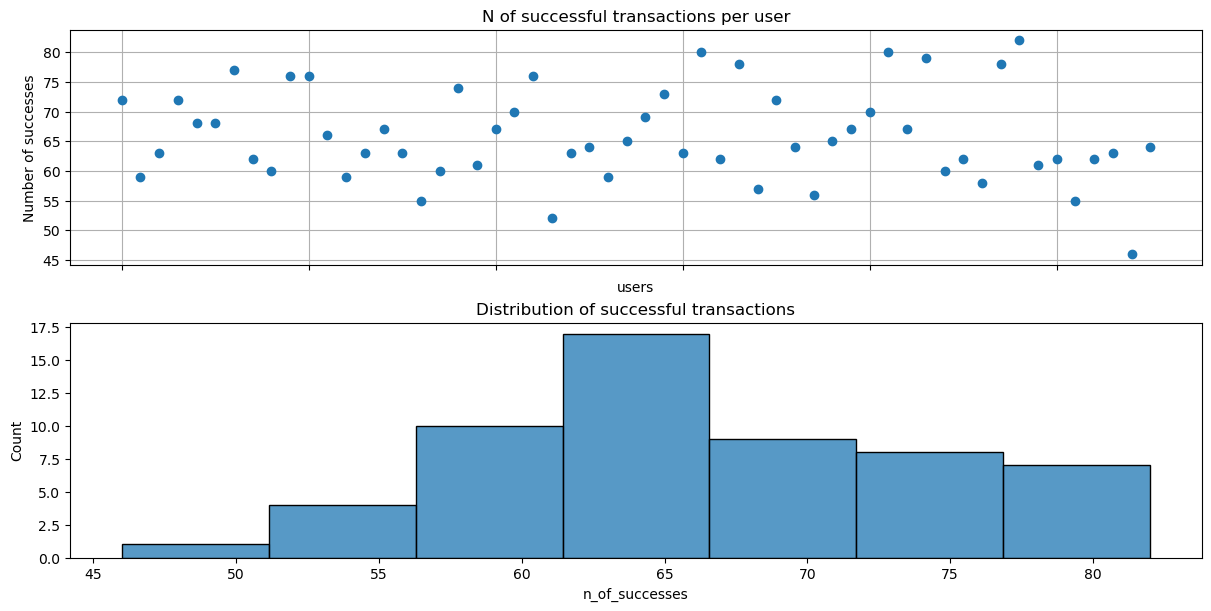

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), layout="constrained");

ax1.plot(dist_df.n_of_successes.values, marker='o', linestyle='')
ax1.set_xticklabels([])  # remove x-axis tick labels
ax1.set(title='N of successful transactions per user',
       ylabel='Number of successes',
       xlabel='users')
ax1.grid()

sns.histplot(data=dist_df, x='n_of_successes', ax=ax2)
ax2.set_title('Distribution of successful transactions');

### –ó–∞–¥–∞–Ω–∏–µ 4
üíÄ –°–ª–æ–∂–Ω–æ–µ –∑–∞–¥–∞–Ω–∏–µ! üíÄ

–ö –≤–∞–º –ø—Ä–∏—à—ë–ª –∫–æ–ª–ª–µ–≥–∞ —Å –Ω–µ–º–Ω–æ–≥–æ –æ–±–Ω–æ–≤–ª–µ–Ω–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ —Å–≤–æ–¥–Ω—É—é —Ç–∞–±–ª–∏—Ü—É user_vs_minute_pivot, –≥–¥–µ:
* —Å—Ç–æ–ª–±—Ü—ã ‚Äì –∏–º–µ–Ω–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π
* —Å—Ç—Ä–æ–∫–∏ ‚Äì –º–∏–Ω—É—Ç–∞ –≤—Ä–µ–º–µ–Ω–∏ –æ—Å—É—â–µ—Å—Ç–≤–ª–µ–Ω–∏—è –æ–ø–µ—Ä–∞—Ü–∏–∏ (minute)
* –∑–Ω–∞—á–µ–Ω–∏—è ‚Äì —á–∏—Å–ª–æ —Å–æ–≤–µ—Ä—à—ë–Ω–Ω—ã—Ö –æ–ø–µ—Ä–∞—Ü–∏–π

–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∑–∞–ø–æ–ª–Ω–∏—Ç–µ –Ω—É–ª—è–º–∏.

Note: —Ñ–∏–ª—å—Ç—Ä–æ–≤–∞—Ç—å —É—Å–ø–µ—à–Ω—ã–µ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–∏ –Ω–µ –Ω—É–∂–Ω–æ - –ø–æ—Å—Ç—Ä–æ–π—Ç–µ —Ç–∞–±–ª–∏—á–∫—É –ø–æ –≤—Å–µ–º.

In [13]:
df.head()

date                name  transaction
0  2020-03-02 00:37:20   Ekaterina_Petrova    cancelled
1  2020-03-02 00:59:09      Irina_Fedorova  successfull
2  2020-03-02 01:06:14  Ekaterina_Smirnova  successfull
3  2020-03-02 00:02:58    Lolita_Polyanova    cancelled
4  2020-03-02 00:17:52      Julia_Smirnova    cancelled

In [14]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5315 non-null   datetime64[ns]
 1   name         5315 non-null   object        
 2   transaction  5315 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 124.7+ KB


In [15]:
df.rename(inplace=True, columns={'date': 'full_date'})
df['only_minutes'] = df['full_date'].dt.minute
df.head()

full_date                name  transaction  only_minutes
0 2020-03-02 00:37:20   Ekaterina_Petrova    cancelled            37
1 2020-03-02 00:59:09      Irina_Fedorova  successfull            59
2 2020-03-02 01:06:14  Ekaterina_Smirnova  successfull             6
3 2020-03-02 00:02:58    Lolita_Polyanova    cancelled             2
4 2020-03-02 00:17:52      Julia_Smirnova    cancelled            17

In [16]:
user_vs_minute_pivot = pd.pivot_table(data=df, index='only_minutes', columns='name',
               values='transaction',  aggfunc = 'count',).fillna(0)
user_vs_minute_pivot.head(10)

name          Ekaterina_Fedorova  Ekaterina_Ivanova  Ekaterina_Lesnova  \
only_minutes                                                             
0                            3.0                4.0                2.0   
1                            4.0                4.0                0.0   
2                            1.0                2.0                4.0   
3                            3.0                0.0                2.0   
4                            3.0                0.0                0.0   
5                            3.0                0.0                2.0   
6                            4.0                1.0                2.0   
7                            3.0                2.0                1.0   
8                            2.0                4.0                3.0   
9                            2.0                4.0                2.0   

name          Ekaterina_Ozerova  Ekaterina_Petrova  Ekaterina_Polyanova  \
only_minutes                                                              
0                           3.0                4.0                  4.0   
1                           4.0                2.0                  5.0   
2                           4.0                2.0                  1.0   
3                           0.0                5.0                  2.0   
4                           3.0                1.0                  1.0   
5                           3.0                1.0                  0.0   
6                           2.0                0.0                  4.0   
7                           2.0                2.0                  3.0   
8                           1.0                0.0                  3.0   
9                           3.0                4.0                  0.0   

name          Ekaterina_Smirnova  Irina_Fedorova  Irina_Ivanova  \
only_minutes                                                      
0                            2.0             1.0            2.0   
1                            4.0             4.0            4.0   
2                            3.0             2.0            3.0   
3                            1.0             3.0            2.0   
4                            2.0             3.0            2.0   
5                            5.0             3.0            1.0   
6                            5.0             2.0            2.0   
7                            4.0             1.0            1.0   
8                            2.0             1.0            1.0   
9                            3.0             2.0            2.0   

name          Irina_Lesnova  ...  Svetlana_Petrova  Svetlana_Polyanova  \
only_minutes                 ...                                         
0                       2.0  ...               0.0                 3.0   
1                       3.0  ...               4.0                 5.0   
2                       3.0  ...               4.0                 1.0   
3                       2.0  ...               1.0                 5.0   
4                       1.0  ...               1.0                 2.0   
5                       3.0  ...               0.0                 2.0   
6                       2.0  ...               2.0                 1.0   
7                       3.0  ...               3.0                 1.0   
8                       0.0  ...               0.0                 1.0   
9                       5.0  ...               2.0                 3.0   

name          Svetlana_Smirnova  Vasilisa_Fedorova  Vasilisa_Ivanova  \
only_minutes                                                           
0                           1.0                1.0               4.0   
1                           3.0                2.0               3.0   
2                           3.0                3.0               0.0   
3                           5.0                2.0               4.0   
4                           2.0                1.0               1.0   
5           

### –ó–∞–¥–∞–Ω–∏–µ 5
–ò—Å–ø—Ä–∞–≤—å—Ç–µ –æ—à–∏–±–∫—É –∫–æ–ª–ª–µ–≥–∏ (–µ—Å–ª–∏ –æ–Ω–∞ –µ—Å—Ç—å üòâ), –∏ –ø–æ—Å—á–∏—Ç–∞–π—Ç–µ —á–∏—Å–ª–æ –º–∏–Ω—É—Ç, –ø—Ä–æ—à–µ–¥—à–∏—Ö —Å –Ω–∞—á–∞–ª–∞ –¥–Ω—è. –†–µ–∑—É–ª—å—Ç–∞—Ç —Å–æ—Ö—Ä–∞–Ω–∏—Ç–µ –≤ –∫–æ–ª–æ–Ω–∫—É true_minute. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫, –∫–∞–∫ –≤ –ø—Ä–µ–¥—ã–¥—É—â–µ–º —à–∞–≥–µ, –∏ –ø–æ—Å–º–æ—Ç—Ä–∏—Ç–µ, –ø—Ä–æ–∏–∑–æ—à–ª–∏ –ª–∏ –∏–∑–º–µ–Ω–µ–Ω–∏—è (–≥—Ä–∞—Ñ–∏–∫ –≤ –∫–æ–¥ –≤–∫–ª—é—á–∞—Ç—å –Ω–µ –Ω—É–∂–Ω–æ).<br>

–ù–∞–ø—Ä–∏–º–µ—Ä:<br>
date                name               transaction  minute  true_minute<br>
2020-03-02 00:37:20 Ekaterina_Petrova  cancelled    37      37<br>
2020-03-02 01:06:14 Ekaterina_Smirnova successfull  6       66<br>

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   full_date     5315 non-null   datetime64[ns]
 1   name          5315 non-null   object        
 2   transaction   5315 non-null   object        
 3   only_minutes  5315 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(2)
memory usage: 145.5+ KB


In [18]:
# the result of these manipulations is int, which is interesting
df = df.assign(
    true_minute=df['full_date'].dt.minute + 60*df['full_date'].dt.hour)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   full_date     5315 non-null   datetime64[ns]
 1   name          5315 non-null   object        
 2   transaction   5315 non-null   object        
 3   only_minutes  5315 non-null   int32         
 4   true_minute   5315 non-null   int32         
dtypes: datetime64[ns](1), int32(2), object(2)
memory usage: 166.2+ KB


full_date                name  transaction  only_minutes  \
0 2020-03-02 00:37:20   Ekaterina_Petrova    cancelled            37   
1 2020-03-02 00:59:09      Irina_Fedorova  successfull            59   
2 2020-03-02 01:06:14  Ekaterina_Smirnova  successfull             6   
3 2020-03-02 00:02:58    Lolita_Polyanova    cancelled             2   
4 2020-03-02 00:17:52      Julia_Smirnova    cancelled            17   

   true_minute  
0           37  
1           59  
2           66  
3            2  
4           17

In [19]:
temp = df.groupby(by='only_minutes', as_index=False) \
    .agg({'transaction': 'count'})
temp.head()

only_minutes  transaction
0             0          111
1             1          145
2             2          123
3             3          129
4             4           92

/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


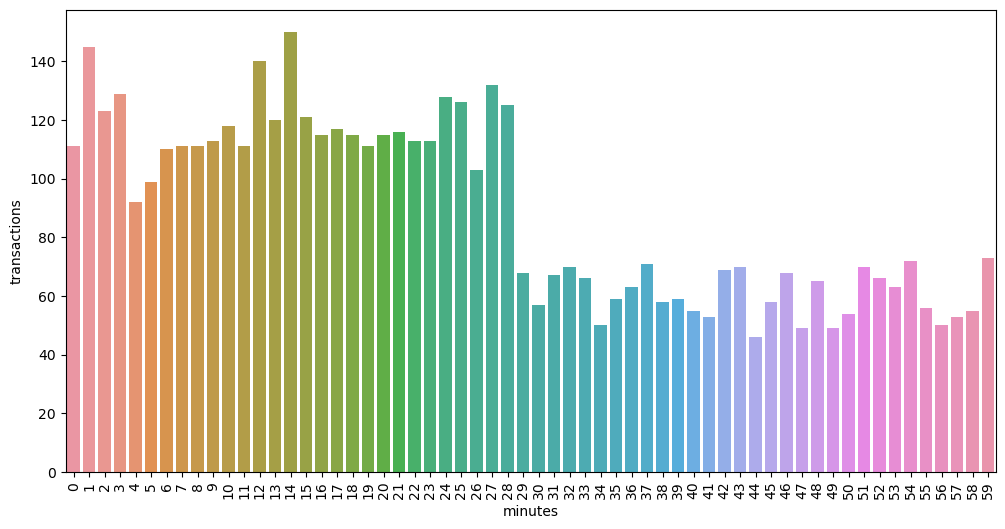

In [20]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(ax=ax, data=temp, x='only_minutes', y='transaction')
ax.set(xlabel='minutes', ylabel='transactions', )
ax.tick_params(axis='x', labelrotation = 90);

### –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–π –ø—Ä–æ–µ–∫—Ç
–í –ø–∞–ø–∫–µ subsid –Ω–∞—Ö–æ–¥—è—Ç—Å—è —Ñ–∞–π–ª—ã (tm_sales_1, tm_sales_2, ...) —Å –ø—Ä–æ–¥–∞–∂–∞–º–∏ –ø—Ä–æ–¥—É–∫—Ç–æ–≤ —á–µ—Ä–µ–∑ —Ç–µ–ª–µ–º–∞—Ä–∫–µ—Ç–∏–Ω–≥. –ö–∞–∂–¥—ã–π —Ñ–∞–π–ª —Å–æ–¥–µ—Ä–∂–∏—Ç, –∫–∞–∫ –º–∏–Ω–∏–º—É–º, 4 –∫–æ–ª–æ–Ω–∫–∏ (–ø–æ–ª—è): FILIAL_ID, SUBS_ID, PROD_ID, ACT_DTTM.

–°—É—Ç—å –∑–∞–¥–∞—á–∏ –≤ —Ç–æ–º, —á—Ç–æ–±—ã –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –ø–æ–¥–∫–ª—é—á–µ–Ω–∏—è –ø—Ä–æ–¥—É–∫—Ç–æ–≤ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã–º –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º, —Å–æ–µ–¥–∏–Ω–∏–≤ —Ñ–∞–π–ª—ã –æ –ø—Ä–æ–¥–∞–∂–∞—Ö —Å –ª–æ–≥–∞–º–∏ –ø–æ –ø–æ–¥–∫–ª—é—á–µ–Ω–∏—è–º –≤ —Å–∏—Å—Ç–µ–º–µ.

–û—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏ –¥–∞–Ω–Ω—ã—Ö:
1. —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ —Ç–µ–ª–µ–º–∞—Ä–∫–µ—Ç–∏–Ω–≥–∞ –Ω–µ –≤—Å–µ–≥–¥–∞ —É–∫–∞–∑—ã–≤–∞—é—Ç –ø–æ–ª–Ω—ã–π id, –µ—Å–ª–∏ 'id' –Ω–µ—Ç –≤ –Ω–∞—á–∞–ª–µ SUBS_ID, —Ç–æ –Ω—É–∂–Ω–æ –µ–≥–æ –¥–æ–±–∞–≤–∏—Ç—å
2. –ø–æ–ª—è –≤ —Ñ–∞–π–ª–∞—Ö –º–æ–≥—É—Ç –±—ã—Ç—å —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω—ã –∞–±—Å–æ–ª—é—Ç–Ω–æ —Å–ª—É—á–∞–π–Ω—ã–º –æ–±—Ä–∞–∑–æ–º, –Ω–æ –Ω–∞–∑–≤–∞–Ω–∏—è –ø–æ–ª–µ–π —Å—Ç–∞—Ç–∏—á–Ω—ã
3. –ø—Ä–æ–¥–∞–∂–∞ –Ω–µ –∑–∞—Å—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è, –µ—Å–ª–∏ –æ—Ç–∫–ª—é—á–µ–Ω–∏–µ (END_DTTM) –ø—Ä–æ–∏–∑–æ—à–ª–æ –º–µ–Ω—å—à–µ —á–µ–º —á–µ—Ä–µ–∑ 5 –º–∏–Ω—É—Ç –ø–æ—Å–ª–µ –ø–æ–¥–∫–ª—é—á–µ–Ω–∏—è (START_DTTM)
4. –µ—Å–ª–∏ –≤ —Ñ–∞–π–ª–µ —Å –ø—Ä–æ–¥–∞–∂–∞–º–∏ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —Å—Ç—Ä–æ–∫–∞ –±–µ–∑ —É–∫–∞–∑–∞–Ω–Ω–æ–≥–æ SUBS_ID, –æ–Ω–∞ –ø—Ä–æ–ø—É—Å–∫–∞–µ—Ç—Å—è

–°–æ—Ö—Ä–∞–Ω–∏—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç –≤ csv —Ñ–∞–π–ª —Å —Ä–∞–∑–¥–µ–ª–∏—Ç–µ–ª–µ–º ';', —Å–æ–¥–µ—Ä–∂–∞—â–∏–π –∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–µ –ø–æ–¥–∫–ª—é—á–µ–Ω–∏—è.

Note: –æ–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ —Ç–æ, –∫–∞–∫ pandas –ø–µ—Ä–µ–≤–æ–¥–∏—Ç –¥–∞—Ç—É –∏–∑ —Å—Ç—Ä–æ–∫–∏, –≤–æ–∑–º–æ–∂–Ω–æ –≤–∞–º –ø–æ–Ω–∞–¥–æ–±–∏—Ç—Å—è –ø–∞—Ä–∞–º–µ—Ç—Ä format

üíÄ –°–ª–æ–∂–Ω–æ–µ –∑–∞–¥–∞–Ω–∏–µ! üíÄ

–î–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –≤–≤–µ–¥–∏—Ç–µ SUBS_ID –∏–∑ –ø–æ–ª—É—á–µ–Ω–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞ –≤ –ø–æ—Ä—è–¥–∫–µ –≤–æ–∑—Ä–∞—Å—Ç–∞–Ω–∏—è, —á–µ—Ä–µ–∑ –∑–∞–ø—è—Ç—É—é —Å –ø—Ä–æ–±–µ–ª–æ–º. –ù–∞–ø—Ä–∏–º–µ—Ä:
<br>*id1, id2*

–°—á–∏—Ç—ã–≤–∞–Ω–∏–µ –ø—É—Ç–µ–π —Ç–æ–ª—å–∫–æ –¥–æ "—Ä–µ–∞–ª—å–Ω—ã—Ö" csv:

In [21]:
files_path = []

# Create a Path object for the root directory
root_directory = Path('subsid')

# Use rglob to iterate through all files and directories recursively
for file_path in root_directory.rglob('*.csv'):
    print(file_path)
    if '.ipynb_checkpoints' in str(file_path):
        continue
    files_path.append(file_path)
    
print(files_path)    

subsid/tm_sales_1.csv
subsid/tm_sales_2.csv
subsid/tm_sales_3.csv
subsid/prod_activations_logs.csv
subsid/.ipynb_checkpoints/tm_sales_1-checkpoint.csv
subsid/.ipynb_checkpoints/tm_sales_2-checkpoint.csv
subsid/.ipynb_checkpoints/tm_sales_3-checkpoint.csv
subsid/.ipynb_checkpoints/prod_activations_logs-checkpoint.csv
[PosixPath('subsid/tm_sales_1.csv'), PosixPath('subsid/tm_sales_2.csv'), PosixPath('subsid/tm_sales_3.csv'), PosixPath('subsid/prod_activations_logs.csv')]


#### –ß—Ç–æ –∏–∑ —Å–µ–±—è –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—Ç 2 –∏–º–µ—é—â–∏—Ö—Å—è —Ç–∏–ø–∞ —Ç–∞–±–ª–∏—Ü:

In [22]:
df_logs = pd.read_csv(files_path[-1], sep=';')
df_logs.head()
# pandas reads first column of csv-file as indices!

SUBS_ID  PROD_ID        START_DTTM          END_DTTM
1  id4651830     1954  20-03-2020 14:59  01-12-2020 00:00
5  id7646509     6431  19-03-2020 13:00  19-03-2020 13:03
2  id7461794     3310  20-03-2020 17:25  01-12-2020 00:00
3  id5416547     1743  17-03-2020 10:17  25-03-2020 11:00
4  id8238421     1859  01-03-2020 11:42  01-03-2020 11:43

In [23]:
df_sales = pd.read_csv(files_path[0], sep=';')
df_sales.head()

SUBS_ID  FILIAL_ID  PROD_ID          ACT_DTTM
0  id4651830          1     1954  20-03-2020 14:59
1    7646509          5     6431  19-03-2020 13:00
2  id7412683          4     3313  22-03-2020 17:25

In [24]:
# delete all data from this df; it will be used as a template for the next step
df_sales.drop(index=df_sales.index, inplace=True)
df_sales

Empty DataFrame
Columns: [SUBS_ID, FILIAL_ID, PROD_ID, ACT_DTTM]
Index: []

#### –†–µ–∞–ª–∏–∑–∞—Ü–∏—è —á—Ç–µ–Ω–∏—è –≤—Å–µ—Ö —Ñ–∞–π–ª–æ–≤ –∏ –∏—Ö —É–º–µ—Å—Ç–Ω–æ–µ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ:

In [25]:
for file_path in files_path:
    if 'tm_sales' in file_path.name:
        df_sales = pd.concat([df_sales, pd.read_csv(file_path, sep=';')],
                             ignore_index=True)
    elif 'prod_activations_logs' in file_path.name:
        df_logs = pd.read_csv(file_path, sep=';').reset_index()
        df_logs.drop(columns='index', inplace=True)        
        
# df_sales.head()
# df_logs.head()

#### –û–±—Ä–∞–±–æ—Ç–∫–∞ df_sales:

In [26]:
df_sales.info()
# there is a NaN value in 'SUBS_ID'
# some IDs don't have required prefix
# ACT_DTTM isn't datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SUBS_ID    9 non-null      object
 1   FILIAL_ID  10 non-null     int64 
 2   PROD_ID    10 non-null     int64 
 3   ACT_DTTM   10 non-null     object
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


In [27]:
def check_id(text):
    if 'id' in text:
        return text
    else:
        return 'id' + text

In [28]:
df_sales.dropna(axis='index', how='any', inplace=True)
df_sales['SUBS_ID'] = df_sales['SUBS_ID'].apply(check_id)
df_sales['ACT_DTTM'] = pd.to_datetime(df_sales['ACT_DTTM'], dayfirst=True)
df_sales

SUBS_ID  FILIAL_ID  PROD_ID            ACT_DTTM
0  id4651830          1     1954 2020-03-20 14:59:00
1  id7646509          5     6431 2020-03-19 13:00:00
2  id7412683          4     3313 2020-03-22 17:25:00
3  id5416547          3     1743 2020-03-17 10:17:00
5  id8362218          7     9879 2020-03-05 11:42:00
6  id2185490          2     3210 2020-03-16 16:28:00
7  id5764122          3     1499 2020-03-18 15:44:00
8  id7642700          6     3020 2020-03-15 14:21:00
9  id1374509          2     5677 2020-03-17 11:48:00

In [29]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SUBS_ID    9 non-null      object        
 1   FILIAL_ID  9 non-null      int64         
 2   PROD_ID    9 non-null      int64         
 3   ACT_DTTM   9 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 360.0+ bytes


#### –û–±—Ä–∞–±–æ—Ç–∫–∞ df_logs:

In [30]:
df_logs.info()
# START_DTTM and END_DTTM isn't datetime
# Need to filter out END_DTTM - START_DTTM = 5 minutes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SUBS_ID     9 non-null      object
 1   PROD_ID     9 non-null      int64 
 2   START_DTTM  9 non-null      object
 3   END_DTTM    9 non-null      object
dtypes: int64(1), object(3)
memory usage: 416.0+ bytes


In [37]:
df_logs['START_DTTM'] = pd.to_datetime(df_logs['START_DTTM'], dayfirst=True)
df_logs['END_DTTM'] = pd.to_datetime(df_logs['END_DTTM'], dayfirst=True)
df_logs['time_difference_sec'] = (df_logs['END_DTTM'] - df_logs['START_DTTM']).dt.total_seconds() 
df_logs['time_difference_min'] = df_logs['time_difference_sec'] / 60
df_logs = df_logs[df_logs["time_difference_min"] > 5].reset_index(drop=True)
df_logs

SUBS_ID  PROD_ID          START_DTTM            END_DTTM  \
0  id4651830     1954 2020-03-20 14:59:00 2020-12-01 00:00:00   
1  id7461794     3310 2020-03-20 17:25:00 2020-12-01 00:00:00   
2  id5416547     1743 2020-03-17 10:17:00 2020-03-25 11:00:00   
3  id8641743     2752 2020-03-20 15:44:00 2020-04-21 15:44:00   
4  id2185490     3210 2020-03-16 16:28:00 2020-12-01 00:00:00   
5  id7642700     3020 2020-03-15 14:21:00 2020-03-15 23:42:00   
6  id8741631     5677 2020-03-19 12:28:00 2020-12-01 00:00:00   

   time_difference_sec  time_difference_min  
0           22064460.0             367741.0  
1           22055700.0             367595.0  
2             693780.0              11563.0  
3            2764800.0              46080.0  
4           22404720.0             373412.0  
5              33660.0                561.0  
6           22159920.0             369332.0

#### –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏—è df_logs & df_sales, —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞:

In [32]:
df_sales

SUBS_ID  FILIAL_ID  PROD_ID            ACT_DTTM
0  id4651830          1     1954 2020-03-20 14:59:00
1  id7646509          5     6431 2020-03-19 13:00:00
2  id7412683          4     3313 2020-03-22 17:25:00
3  id5416547          3     1743 2020-03-17 10:17:00
5  id8362218          7     9879 2020-03-05 11:42:00
6  id2185490          2     3210 2020-03-16 16:28:00
7  id5764122          3     1499 2020-03-18 15:44:00
8  id7642700          6     3020 2020-03-15 14:21:00
9  id1374509          2     5677 2020-03-17 11:48:00

In [33]:
df_logs

SUBS_ID  PROD_ID          START_DTTM            END_DTTM  \
0  id4651830     1954 2020-03-20 14:59:00 2020-12-01 00:00:00   
2  id7461794     3310 2020-03-20 17:25:00 2020-12-01 00:00:00   
3  id5416547     1743 2020-03-17 10:17:00 2020-03-25 11:00:00   
5  id8641743     2752 2020-03-20 15:44:00 2020-04-21 15:44:00   
6  id2185490     3210 2020-03-16 16:28:00 2020-12-01 00:00:00   
7  id7642700     3020 2020-03-15 14:21:00 2020-03-15 23:42:00   
8  id8741631     5677 2020-03-19 12:28:00 2020-12-01 00:00:00   

   time_difference_sec  time_difference_min  
0           22064460.0             367741.0  
2           22055700.0             367595.0  
3             693780.0              11563.0  
5            2764800.0              46080.0  
6           22404720.0             373412.0  
7              33660.0                561.0  
8           22159920.0             369332.0

In [34]:
df_combined = pd.merge(left=df_logs, right=df_sales, how='inner')
df_combined

SUBS_ID  PROD_ID          START_DTTM            END_DTTM  \
0  id4651830     1954 2020-03-20 14:59:00 2020-12-01 00:00:00   
1  id5416547     1743 2020-03-17 10:17:00 2020-03-25 11:00:00   
2  id2185490     3210 2020-03-16 16:28:00 2020-12-01 00:00:00   
3  id7642700     3020 2020-03-15 14:21:00 2020-03-15 23:42:00   

   time_difference_sec  time_difference_min  FILIAL_ID            ACT_DTTM  
0           22064460.0             367741.0          1 2020-03-20 14:59:00  
1             693780.0              11563.0          3 2020-03-17 10:17:00  
2           22404720.0             373412.0          2 2020-03-16 16:28:00  
3              33660.0                561.0          6 2020-03-15 14:21:00

In [35]:
df_combined.to_csv('miniproject_5_result.csv', sep=';', index=False)

In [36]:
answer = ''
for i in np.sort(df_combined['SUBS_ID'].values):
    text = f'{i}, '
    answer+=text
answer

'id2185490, id4651830, id5416547, id7642700, '